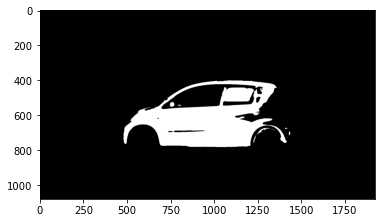

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('test.jpg')

blur = cv2.blur(img,(5,5))
blur0=cv2.medianBlur(blur,5)
blur1= cv2.GaussianBlur(blur0,(5,5),0)
blur2= cv2.bilateralFilter(blur1,9,75,75)

hsv = cv2.cvtColor(blur2, cv2.COLOR_BGR2HSV)

low_blue = np.array([60, 40, 50])
high_blue = np.array([255, 255, 255])
mask = cv2.inRange(hsv, low_blue, high_blue)

res = cv2.bitwise_and(img,img, mask=mask)

gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

plt.imshow(img_thresh, cmap = 'gray')

In [3]:
# alle koordinaten finden die nicht null sind
indexes = np.where(img_thresh>0)

# in indexes[0] sind alle x indices
min_y = min(indexes[0])
max_y = max(indexes[0])

# in indexes[1] sind alle y indices
min_x = min(indexes[1])
max_x = max(indexes[1])

# davon immer das min und max bestimmen

print('The minimum x coordinate is', min_x)
print('The maximum x coordinate is', max_x)
print('The minimum y coordinate is', min_y)
print('The maximum y coordinate is', max_y)

The minimum x coordinate is 479
The maximum x coordinate is 1433
The minimum y coordinate is 132
The maximum y coordinate is 783


In [4]:
# Höhe und breite bekommt man durch die Substraktion der min und max Werte
height_px = max_y - min_y
width_px = max_x - min_x

print(f'The width of the vehicle is {width_px} pixels')
print(f'The height of the vehicle is {height_px} pixels')

The width of the vehicle is 954 pixels
The height of the vehicle is 651 pixels
